# Network of networks

Networks where created, this networks have topologies and functions. The topological and dynamic distance was compared.

Each network has a name that corresponds to: 
* MOTIF: motif of network
* ID, ID: parameter of order
* MODEL: Number of model/function

Only comparisons between different networks where taken into account.

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

Load data. The data is a list of edges with topological and dynamical distance.

In [2]:
# Load data
data = np.genfromtxt('distancias3nodos.csv', delimiter=',', dtype=np.int32)
# remove header
data = np.delete(data, 0, 0)

We will add a motif edge index and a color
1. m1-m1 blue
2. m1-m2 'cyan'
3. m1-m3 'DeepPink'
4. m1-m4 'magenta'
5. m2-m2 'green'
6. m2-m3 'Brown'
7. m2-m4 'Olive'
8. m3-m3 'Orange'
9. m3-m4 'OrangeRed'
10. m4-m4 'red'


In [3]:
def edges2index( data ):
    index = [str(d[0]) + str(d[1]) for d in data ]
    index = [d[0]+d[4]+d[1]+d[5]+d[2]+d[6]+d[3]+d[7] for d in index ]
    index = [int(d) for d in index]
    return index

def edges2motifcolor( data ):
    color = []
    for d in data:
        i = int(str(d[0])[0] + str(d[1])[0])
        if i == 11: color.append('blue')
        if i == 12: color.append('cyan')
        if i == 13: color.append('deeppink')
        if i == 14: color.append('m')
        if i == 22: color.append('green')
        if i == 23: color.append('brown')
        if i == 24: color.append('olive')
        if i == 33: color.append('orange')
        if i == 34: color.append('orangered')
        if i == 44: color.append('r')
    return color

## Distance distribution

Distribution of topological distances

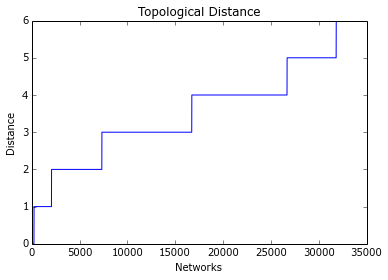

In [4]:
d_top = data[:,2]
plt.plot(sorted(d_top), 'b')
plt.xlabel('Networks')
plt.ylabel('Distance')
plt.title('Topological Distance')
plt.show()

Distribution of dynamic distances

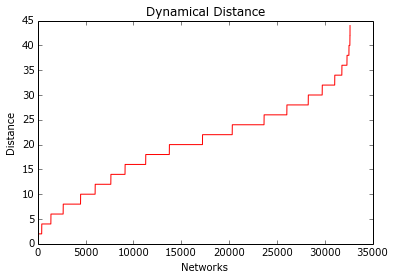

In [5]:
d_dyn = data[:,3]
plt.xlabel('Networks')
plt.ylabel('Distance')
plt.title('Dynamical Distance')
plt.plot(sorted(d_dyn), 'r') #All distances

plt.show()

* Does it follows a distribution?

Separate by topological distance

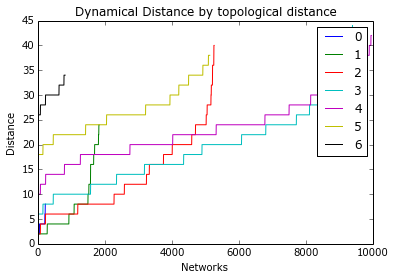

In [6]:
for i in range(0, max(data[:,2])+1): #sort by topological distance
    data_i = data[data[:,2]==i]
    d_dyn_i = data_i[:,3]
    plt.plot(sorted(d_dyn_i), label=str(i))
plt.xlabel('Networks')
plt.ylabel('Distance')
plt.title('Dynamical Distance by topological distance')
plt.legend()

plt.show()

Topological vs dynamic distances

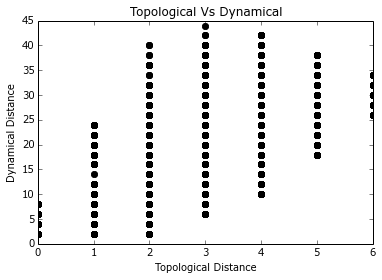

In [7]:
plt.plot(d_top, d_dyn, 'ko')
plt.xlabel('Topological Distance')
plt.ylabel('Dynamical Distance')
plt.title('Topological Vs Dynamical')
plt.show()

This is confusing, maybe add a third axis and sort in a better way...

We'll plot by index, intercalating the numbers, so 1001-1021 -> 11000211

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


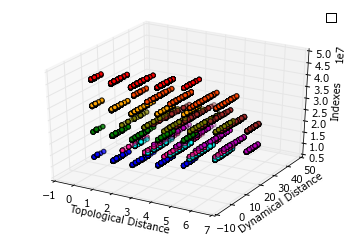

In [8]:
from mpl_toolkits.mplot3d import Axes3D

index = edges2index(data)
color = edges2motifcolor(data)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(d_top, d_dyn, index, c=color)
ax.legend('Distances by index')
ax.set_xlabel('Topological Distance')
ax.set_ylabel('Dynamical Distance')
ax.set_zlabel('Indexes')

plt.show()

Well... Comparisons between same motifs have smaller distances... the rest is a disaster.

Lets filter to obtain only the edges with topological distance 0 and 2

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


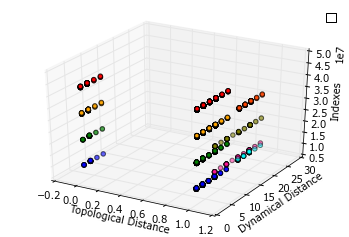

In [9]:
data0 = data[data[:,2]<=1]

index0 = edges2index(data0)
color0 = edges2motifcolor(data0)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(data0[:,2], data0[:,3], index0, c=color0)
ax.legend('D_top 0 by index')
ax.set_xlabel('Topological Distance')
ax.set_ylabel('Dynamical Distance')
ax.set_zlabel('Indexes')

plt.show()

Lets plot d_top vs d_dyn only for the comparisons among same motifs.

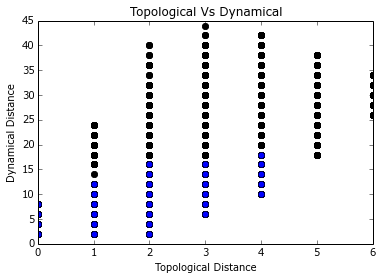

In [10]:
motif = '11'
d_top_m = [   d_t for n1, n2, d_t, d_d in data if (str(n1)[0]+str(n2)[0] == motif)   ]
d_dyn_m = [   d_d for n1, n2, d_t, d_d in data if (str(n1)[0]+str(n2)[0] == motif)   ]

plt.plot(d_top, d_dyn, 'ko') #All distances
plt.plot(d_top_m, d_dyn_m, 'bo') #moti distances
plt.xlabel('Topological Distance')
plt.ylabel('Dynamical Distance')
plt.title('Topological Vs Dynamical')
plt.show()

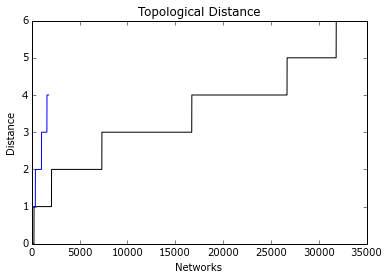

In [11]:
plt.xlabel('Networks')
plt.ylabel('Distance')
plt.title('Topological Distance')
plt.plot(sorted(d_top), 'k') #All distances
plt.plot(sorted(d_top_m), 'b') #motifs distances
plt.show()

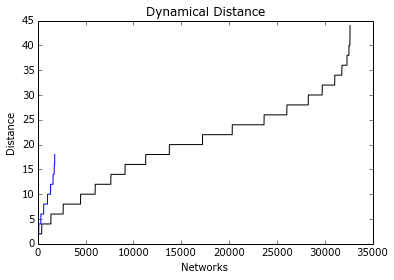

In [12]:
plt.xlabel('Networks')
plt.ylabel('Distance')
plt.title('Dynamical Distance')
plt.plot(sorted(d_dyn), 'k') #All distances
plt.plot(sorted(d_dyn_m), 'b') #motifs distances
plt.show()

## Network

First,lets create a network

Nodes are networks:
* name
* motif
* func _(loop functionality)_
* f_color

Edges:
* w_top
* w_dyn
* index _(mixed index of nodes)_
* m_color _(color of motifs)_

In [13]:
import networkx as nx

G = nx.Graph()

#first, create nodes with funcionality
f = open('Networks_Functionaliy_Results.csv','r')
f.readline() #remove header
for line in f:
    line = line.strip().split(',')
    if line[1] == '': #no func
        G.add_node(int(line[0]), motif=int(line[0][0]),
                  func=line[1], f_color='black')
    elif line[1][-1] == 'A': #func A
        G.add_node(int(line[0]), motif=int(line[0][0]),
                  func=line[1], f_color='red')
    elif line[1][-1] == 'B': #func B
        G.add_node(int(line[0]), motif=int(line[0][0]),
                  func=line[1], f_color='green')
f.close()
#G.nodes(data=True)

#lets add edges, no threshold (yet)
for d in zip(data.tolist(), edges2index(data), edges2motifcolor(data)):
    G.add_edge(d[0][0], d[0][1], 
               w_top=d[0][2], w_dyn=d[0][3],
               index=d[1], m_color=d[2])

#G.nodes(data=True)
#G.edges(data=True)

First, lets threshold by d_top = 0 and plot. We'll color with motif and label with funloops

In [14]:
G0 = G.copy()
# remove edgens with d_top > 0
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_top']!=0]
G0.remove_edges_from(del_edges)
# remove unconnected nodes
deg = G0.degree()
del_nodes = [n for n in deg if deg[n] == 0]
G0.remove_nodes_from(del_nodes)

#G0.edges(data=True)
#G0.nodes(data=True)

Plot with lightning

First we need a matrix of weights, we will cut using d_top and the weights come from d_dyn.

In [19]:
i = 1 #threshold
Gi = G.copy()
# remove edgens with d_top > i
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_top']>i]
Gi.remove_edges_from(del_edges)

Di_dyn = np.array(nx.to_numpy_matrix(Gi, weight='w_dyn', nonedge=None))
np.nanmax(Di_dyn)-Di_dyn #Transform from weight to force.
Di_dyn = np.nan_to_num(Di_dyn)
Di_dyn

f_color = [Gi.node[n]['f_color'] for n in Gi.nodes()]
f_color = [ [255,0,255] if c=='red' 
         else [255,255,0] if c=='green' 
         else [150,150,150] for c in f_color]

yeah, I changed the colors


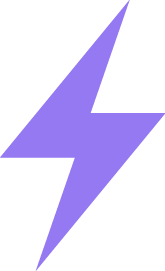

Running local mode, some functionality limited.



In [20]:
from lightning import Lightning
from numpy import random
lgn = Lightning(ipython=True, local=True)

lgn.force(Di_dyn, color=f_color)

Lets cut by d_dyn and color by motif

1. m1 'blue'
2. m2 'cyan'
3. m3 'green'
4. m4 'red'

In [21]:
m_color = [Gi.node[n]['motif'] for n in Gi.nodes()]
m_color = [ [0,0,255] if c==1 
         else [0,255,255] if c==2 
         else [0,255,0] if c==3 
         else [255,0,0] if c==4 
         else [150,150,150] for c in m_color]

In [22]:
i = 1 #threshold
Gi = G.copy()
# remove edgens with d_top > i
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_dyn']>i]
Gi.remove_edges_from(del_edges)

Di_dyn = np.array(nx.to_numpy_matrix(Gi, weight='w_dyn', nonedge=None))
np.nanmax(Di_dyn)-Di_dyn #Transform from weight to force.
Di_dyn = np.nan_to_num(Di_dyn)

lgn.force(Di_dyn, color=m_color)

/usr/local/lib/python3.4/dist-packages/numpy/lib/nanfunctions.py:326: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


In [23]:
i = 2 #threshold
Gi = G.copy()
# remove edgens with d_top > i
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_dyn']>i]
Gi.remove_edges_from(del_edges)

Di_dyn = np.array(nx.to_numpy_matrix(Gi, weight='w_dyn', nonedge=None))
np.nanmax(Di_dyn)-Di_dyn #Transform from weight to force.
Di_dyn = np.nan_to_num(Di_dyn)

lgn.force(Di_dyn, color=m_color)

In [24]:
lgn.force(Di_dyn, color=f_color)

In [25]:
i = 4 #threshold
Gi = G.copy()
# remove edgens with d_top > i
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_dyn']>i]
Gi.remove_edges_from(del_edges)

Di_dyn = np.array(nx.to_numpy_matrix(Gi, weight='w_dyn', nonedge=None))
np.nanmax(Di_dyn)-Di_dyn #Transform from weight to force.
Di_dyn = np.nan_to_num(Di_dyn)

lgn.force(Di_dyn, color=m_color)

In [26]:
i = 8 #threshold
Gi = G.copy()
# remove edgens with d_top > i
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_dyn']>i]
Gi.remove_edges_from(del_edges)

Di_dyn = np.array(nx.to_numpy_matrix(Gi, weight='w_dyn', nonedge=None))
np.nanmax(Di_dyn)-Di_dyn #Transform from weight to force.
Di_dyn = np.nan_to_num(Di_dyn)

lgn.force(Di_dyn, color=m_color)

In [27]:
i = 12 #threshold
Gi = G.copy()
# remove edgens with d_top > i
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_dyn']>i]
Gi.remove_edges_from(del_edges)

Di_dyn = np.array(nx.to_numpy_matrix(Gi, weight='w_dyn', nonedge=None))
np.nanmax(Di_dyn)-Di_dyn #Transform from weight to force.
Di_dyn = np.nan_to_num(Di_dyn)

lgn.force(Di_dyn, color=m_color)

Lets see how thresholding affects the number of components.

First, topological distance

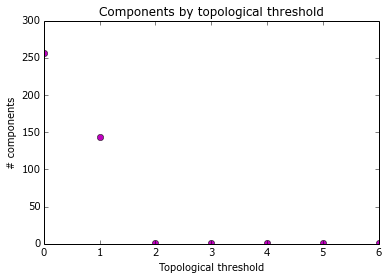

In [28]:
for i in range(0, max(data[:,2]+1)): #sort by topological distance
    Gi = G.copy()
    # remove edgens with d_top > 0
    del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_top']>=i]
    Gi.remove_edges_from(del_edges)
    n = nx.number_connected_components(Gi)
    plt.plot(i, n, 'mo')

plt.xlabel('Topological threshold')
plt.ylabel('# components')
plt.title('Components by topological threshold')

plt.show()

Lets separate by motif and plot.

1 b
2 c
3 g
4 r


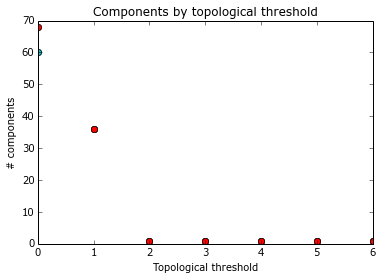

In [29]:
for m, c in [  [1,'b'], [2,'c'], [3,'g'], [4,'r']  ]:
    print(m,c)
    n_motif = [   n for n in G.nodes() if G.node[n]['motif']==m   ]
    Gm = G.subgraph(n_motif)
    
    for i in range(0, max(data[:,2]+1)): #sort by topological distance
        Gi = Gm.copy()
        # remove edgens with d_top > 0
        del_edges = [ (u,v,d) for u,v,d in Gm.edges(data=True) if d['w_top']>=i]
        Gi.remove_edges_from(del_edges)
        n = nx.number_connected_components(Gi)
        plt.plot(i, n, c+'o')

plt.xlabel('Topological threshold')
plt.ylabel('# components')
plt.title('Components by topological threshold')

plt.show()

Lets try dynamical distance

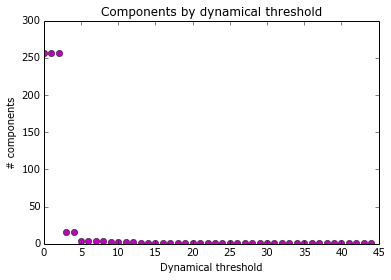

In [30]:
for i in range(0, max(data[:,3]+1)): #sort by topological distance
    Gi = G.copy()
    # remove edgens with d_top > 0
    del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_dyn']>=i]
    Gi.remove_edges_from(del_edges)
    n = nx.number_connected_components(Gi)
    plt.plot(i, n, 'mo')

plt.xlabel('Dynamical threshold')
plt.ylabel('# components')
plt.title('Components by dynamical threshold')

plt.show()

1 b
2 c
3 g
4 r


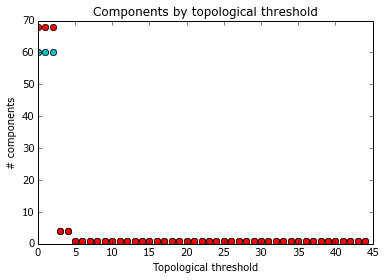

In [31]:
for m, c in [  [1,'b'], [2,'c'], [3,'g'], [4,'r']  ]:
    print(m,c)
    n_motif = [   n for n in G.nodes() if G.node[n]['motif']==m   ]
    Gm = G.subgraph(n_motif)
    
    for i in range(0, max(data[:,3]+1)): #sort by topological distance
        Gi = Gm.copy()
        # remove edgens with d_top > 0
        del_edges = [ (u,v,d) for u,v,d in Gm.edges(data=True) if d['w_dyn']>=i]
        Gi.remove_edges_from(del_edges)
        n = nx.number_connected_components(Gi)
        plt.plot(i, n, c+'o')

plt.xlabel('Topological threshold')
plt.ylabel('# components')
plt.title('Components by topological threshold')

plt.show()

Interesting, the components are in levels, but the distribution is almost continuous

## Dendogram

Clustering!

First, lets get the matrixes and remove nans. The matrixes are in the order of G.nodes()

In [32]:
D_top = np.array(nx.to_numpy_matrix(G, weight='w_top', nonedge=None))
D_top = np.nan_to_num(D_top)
D_dyn = np.array(nx.to_numpy_matrix(G, weight='w_dyn', nonedge=None))
D_dyn = np.nan_to_num(D_dyn)

Cluster and verify clustering

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(D_dyn,'ward')
Z

#Verify clustering, 1 is ideal
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(D_dyn))
c

0.88233013376558944

Could be worse. D_dyn is .882; D_top is .415, which is unaceptable. 'Ward' gives best results.

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


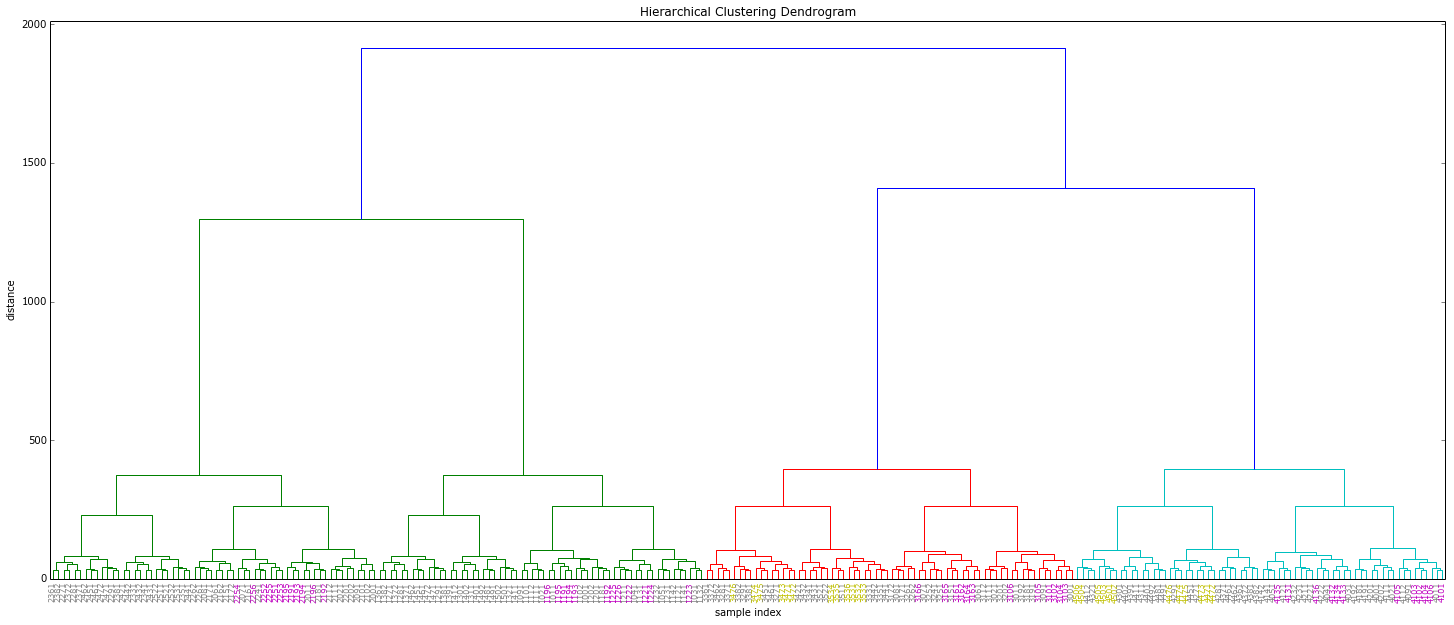

In [34]:
node_labels = list(G.nodes())
#node_labels = [G.node[n]['func']+'-'+str(n) for n in node_labels]

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    labels=node_labels,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

label_colors = {'1191':'m', '1192':'m', '1193':'m', '1194':'m', '1195':'m', '1196':'m', '1221':'m', '1222':'m', '1223':'m', '1224':'m', '1225':'m', '1226':'m', '2191':'m', '2192':'m', '2193':'m', '2194':'m', '2195':'m', '2196':'m', '2251':'m', '2252':'m', '2253':'m', '2254':'m', '2255':'m', '2256':'m', '3101':'m', '3102':'m', '3103':'m', '3104':'m', '3105':'m', '3106':'m', '3161':'m', '3162':'m', '3163':'m', '3164':'m', '3165':'m', '3166':'m', '3471':'y', '3472':'y', '3473':'y', '3474':'y', '3475':'y', '3476':'y', '3531':'y', '3532':'y', '3533':'y', '3534':'y', '3535':'y', '3536':'y', '4101':'m', '4102':'m', '4103':'m', '4104':'m', '4105':'m', '4106':'m', '4131':'m', '4132':'m', '4133':'m', '4134':'m', '4135':'m', '4136':'m', '4471':'y', '4472':'y', '4473':'y', '4474':'y', '4475':'y', '4476':'y', '4501':'y', '4502':'y', '4503':'y', '4504':'y', '4505':'y', '4506':'y'}

ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    #print(lbl.get_text(),)
    if lbl.get_text() in label_colors.keys():
        lbl.set_color(label_colors[lbl.get_text()])
    else: lbl.set_color('grey')

plt.show()

It groups by motif, and most (but not all) nets with the same topology are near. I recomend opening the image in new tab for checking.

I can add a heatmap, but I'm not sure it would add anything interesting.

There is not a clear distribution in the functional loops

Note: consider truncating the dendogram, basicaly, do I need to separate in clusters?

Note: try log axis and roll on to see names

## Fun Loops!

Epileptic trees: fun loops only appear in networks that have 6 possible models, and usually only in 4/6 models

It would be worthy to plot all networks with a functionality and compare transition tables